# 요일-음식 종류와 요일-업체의  GVSM 기반 및 Correlation 네트워크

## 목차

    0. 데이터 전처리 과정 및 결과
    1. 요일 - 음식 종류
        1-1 요일별 음식 종류 리뷰 횟수 Matrix
        1-2 요일별 음식 종류 리뷰 횟수의 GVSM기반 Network
        1-3 요일별 음식 종류 리뷰 횟수 Co-relation 기반 시각화 및 중심도 분석
            1-3-1 상관관계를 이용한 Heatmap, 해석
            1-3-2 상관관계를 이용한 network, 해석
              
    2. 요일 - 음식점 
        2-1 요일별 각 음식점 이용 횟수 Matrix
        2-2 요일별 음식점 리뷰 횟수 GVSM기반 Network
        2-3 요일별 음식점 리뷰 횟수 Co-relation 기반 시각화 및 중심도 분석
         2-3-1 상관관계를 이용한 Heatmap, 해석
         2-3-2 상관관계를 이용한 network, 해석
           
     3. 각 요일별 가장 많은 리뷰횟수 업체
     4. 결과

In [1]:
import pandas as pd
import networkx as nx 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# warning 메세지 
warnings.simplefilter("ignore")

In [2]:
# 윈도우의 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

# 시각화 그래프가 노트북 안에 보이게 하기
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

## 데이터 전처리 과정 및 결과
1) data 탐색 (컬럼내의 값, 결측치 탐색)  
2) 각 가게의 전체요일과 요일별 리뷰횟수 탐색  
3) 막대그래프를 이용한 가게의 리뷰횟수 시각화  

In [3]:
# data확인
df = pd.read_csv('./data/data_review.csv',encoding='utf-8')
df

,업체명,카테고리,메뉴,맛,양,배달,리뷰,date
0,전주석쇠불고기-본점,한식,파절이매콤통삼겹（2~3인）（공기밥2＋김치찌개＋밑반찬＋쌈）/1,5.0,5.0,5.0,자주시켜먹는 단골집인데 항상변치않고 맛있습니다! !!,2017년 12월 6일 수요일
1,전주석쇠불고기-본점,한식,통삼겹살 2人（고기＋공기밥2＋김치찌개＋쌈＋밑반찬）/1(추가 선택(고기 추가)),5.0,5.0,5.0,"배달 시간도 오래걸리지 않고, 양이 적을거 같아서 고기 추가를 했는데..안해도 됐었...",2017년 9월 30일 토요일
2,전주석쇠불고기-본점,한식,통삼겹살 2人（고기＋공기밥2＋김치찌개＋쌈＋밑반찬）/1,NaN,NaN,NaN,굿굿,2017년 9월 23일 토요일
3,전주석쇠불고기-본점,한식,통삼겹（小／500g）（냉열무국수 or 냉열무우동 or 비빔열무국수＋쌈）/1(메뉴 선...,5.0,5.0,5.0,배달도빠르고맛나요ㅁ,2018년 3월 13일 화요일
4,전주석쇠불고기-본점,한식,통삼겹（3~4인）（김치찌개＋공기밥3＋밑반찬＋쌈）/1,5.0,5.0,5.0,찌개와 통삼겹 맛있는 5찬. 많이 먹는편이라 3인분짜리 주문했는데... 배터지는줄 ...,2018년 2월 27일 화요일
...,...,...,...,...,...,...,...,...
28912,동강,중식,NaN,NaN,NaN,NaN,좋아요,2013년 12월 31일 화요일
28913,동강,중식,NaN,NaN,NaN,NaN,맛있ㅇㅓ욧,2013년 12월 29일 일요일
28914,동강,중식,NaN,NaN,NaN,NaN,맛이게다,2013년 12월 25일 수요일
28915,동강,중식,NaN,NaN,NaN,NaN,여기 맛있어요 이근처 탕수육은 냄새?ㅜㅜ돼지냄새?나는 곳이 너무 많은데 여긴안그래요...,2013년 12월 10일 화요일


In [4]:
# 데이터 컬럼확인
df.columns

Index(['업체명', '카테고리', '메뉴', '맛', '양', '배달', '리뷰', 'date'], dtype='object')

In [5]:
# 각 컬럼에 대한 값 확인 
for i in df.columns:
    print(i,'\n', df[i].unique(),'\n\n')

업체명 
 ['전주석쇠불고기-본점' '피자샵-자양성수점' '피자마스터' '피자나라치킨공주(자양점)' '참살이임실치즈피자' '홍닭'
 '파리에다녀온치킨-건대점' '놀부옛날통닭-군자점' '굽네치킨-화양점' 'BHC-중곡점' 'BHC-중곡대박점' 'BHC-자양행복점'
 'BHC-성수점' 'BHC-성수역점' '요리왕' '위풍당당족발풍족' '도야족발-장안점' '도야족발-본점' 'HONEY쇼우가족발'
 'LA돈까스' '화룡불닭' '직화신불닭' '화양156' '찡떡-통오찡어떡볶이' '불난떡볶이-광진구점' '미스몽도시락-건대점'
 '동강'] 


카테고리 
 ['한식' '피자' '치킨' '중식' '족발/보쌈' '일식/돈까스' '야식' '분식'] 


메뉴 
 ['파절이매콤통삼겹（2~3인）（공기밥2＋김치찌개＋밑반찬＋쌈）/1'
 '통삼겹살 2人（고기＋공기밥2＋김치찌개＋쌈＋밑반찬）/1(추가 선택(고기 추가))'
 '통삼겹살 2人（고기＋공기밥2＋김치찌개＋쌈＋밑반찬）/1' ...
 '1세트（탕수육＋짜장2）/1(식사선택1(볶음밥（보통）),식사선택2(볶음밥（보통）))'
 '1세트（탕수육＋짜장2）/1(식사선택1(볶음밥（곱빼기）),식사선택2(볶음밥（보통）))'
 '10세트（깐쇼새우＋짜장2）/1(식사선택1(짜장（보통）),식사선택2(짜장（보통）))'] 


맛 
 [ 5. nan  3.  4.  2.  1.] 


양 
 [ 5. nan  3.  4.  1.  2.] 


배달 
 [ 5. nan  4.  3.  2.  1.] 


리뷰 
 ['자주시켜먹는 단골집인데 항상변치않고 맛있습니다! !!'
 '배달 시간도 오래걸리지 않고, 양이 적을거 같아서 고기 추가를 했는데..안해도 됐었네요ㅋㅋ. 맛도 이정도면 괜찮다고 생각이 듭니다.'
 '굿굿' ... '맛이게다'
 '여기 맛있어요 이근처 탕수육은 냄새?ㅜㅜ돼지냄새?나는 곳이 너무 많은데 여긴안그래요 짜장도맛있구 짬뽕도 마시뜸 짜장탕슉세트 생겼으면 좋겟어요'
 '맛있어요 또시켜먹어야지 추천할께요'] 


date 
 ['2017년 12월 6일 

In [6]:
# 각 컬럼의 결측치 개수 확인
for i in df.columns:
    print(i,'의 결측치 개수' ,df[i].isnull().sum(),'개')

업체명 의 결측치 개수 0 개
카테고리 의 결측치 개수 0 개
메뉴 의 결측치 개수 10949 개
맛 의 결측치 개수 15721 개
양 의 결측치 개수 15721 개
배달 의 결측치 개수 15721 개
리뷰 의 결측치 개수 7 개
date 의 결측치 개수 8 개


전주석쇠불고기-본점의 리뷰 수 594
피자샵-자양성수점의 리뷰 수 825
피자마스터의 리뷰 수 1731
피자나라치킨공주(자양점)의 리뷰 수 0
참살이임실치즈피자의 리뷰 수 504
홍닭의 리뷰 수 1319
파리에다녀온치킨-건대점의 리뷰 수 596
놀부옛날통닭-군자점의 리뷰 수 740
굽네치킨-화양점의 리뷰 수 608
BHC-중곡점의 리뷰 수 774
BHC-중곡대박점의 리뷰 수 1433
BHC-자양행복점의 리뷰 수 1152
BHC-성수점의 리뷰 수 727
BHC-성수역점의 리뷰 수 633
요리왕의 리뷰 수 1808
위풍당당족발풍족의 리뷰 수 697
도야족발-장안점의 리뷰 수 2479
도야족발-본점의 리뷰 수 845
HONEY쇼우가족발의 리뷰 수 668
LA돈까스의 리뷰 수 614
화룡불닭의 리뷰 수 1564
직화신불닭의 리뷰 수 2090
화양156의 리뷰 수 554
찡떡-통오찡어떡볶이의 리뷰 수 1078
불난떡볶이-광진구점의 리뷰 수 1296
미스몽도시락-건대점의 리뷰 수 1542
동강의 리뷰 수 1232


<BarContainer object of 27 artists>

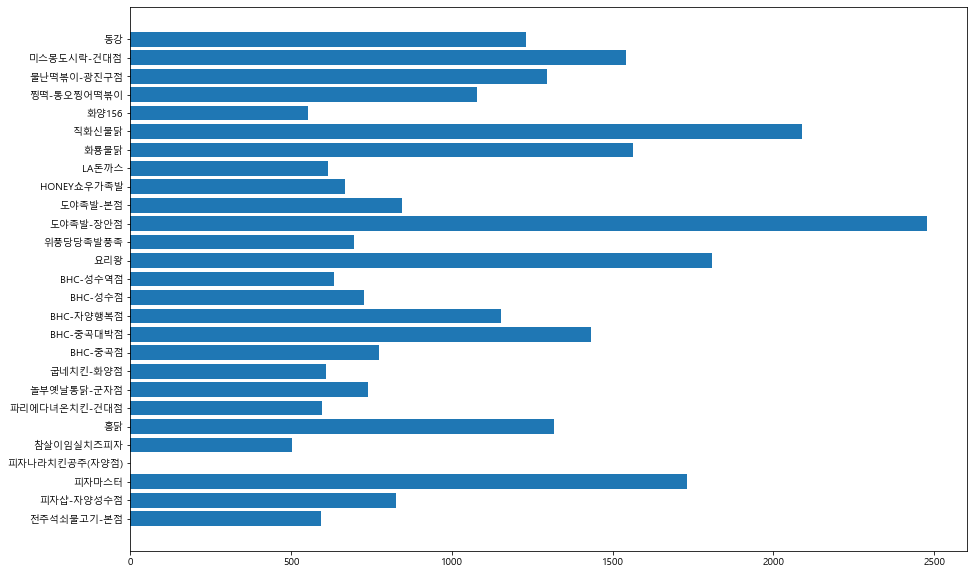

In [7]:
# 해당 데이터내에서 각 가게의 리뷰 개수 및 시각화
count = []
restaurants = df['업체명'].unique()

for i in restaurants:
    print('{}의 리뷰 수'.format(i), len(df[df['업체명'].str.contains(i)]))
    count.append(len(df[df['업체명'].str.contains(i)]))

plt.figure(figsize=(15,10))
# plt.
plt.barh(restaurants, count)

월요일 3915
화요일 4045
수요일 3666
목요일 3410
금요일 3460
토요일 4760
일요일 5653


<BarContainer object of 7 artists>

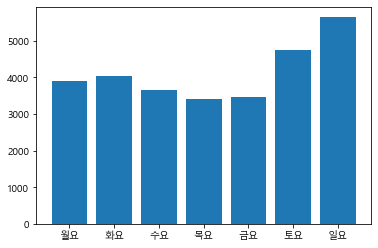

In [8]:
# 요일별 리뷰 개수 확인 및 시각화
count = []
days= ['월요','화요','수요','목요','금요','토요','일요']
for i in days:
    print(i+'일',len(df[df['date'].str.contains(i,na=False)]))
    count.append(len(df[df['date'].str.contains(i,na=False)]))
    
plt.bar(days, count)

# 1. 요일 - 음식 종류 
- doc-term 방법 이용

## 1-1 요일별 음식 종류 리뷰 횟수 Matrix
각 요일별 음식 리뷰 횟수를 Matrix(df_days)로 만들었습니다.   
df_days는 요일을 row , 음식을 columns로 가집니다.  
df_days를 이용해 각 요일별 음식 이용 횟수에 따른 상관관계를 시각화하고 네트워크 분석을 했습니다.

In [9]:
days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
cate = df['카테고리'].unique()
df_days = pd.DataFrame(columns = df['카테고리'].unique() , index = days)

In [10]:
# 요일별 - 음식 카테고리 Matrix
for day in days:
    df_day = df[df['date'].str.contains(day,na=False)]
    count = []
    for i in cate:
        count.append(len(df_day[df_day['카테고리'].str.contains(i,na=False)]))
    df_days.loc[day] = count
df_days

,한식,피자,치킨,중식,족발/보쌈,일식/돈까스,야식,분식
월요일,267,558,1024,453,609,85,497,422
화요일,301,473,1287,405,589,79,530,381
수요일,313,452,1132,364,529,67,453,356
목요일,264,449,888,325,600,73,441,370
금요일,300,427,959,338,626,80,399,331
토요일,375,686,1258,471,815,102,572,481
일요일,316,821,1434,684,921,128,762,587


## 1-2 요일별 음식 종류 리뷰 횟수의 GVSM기반 Network

In [11]:
df_days_count = df_days.T.dot(df_days)
df_days_count=  df_days_count.astype('int')

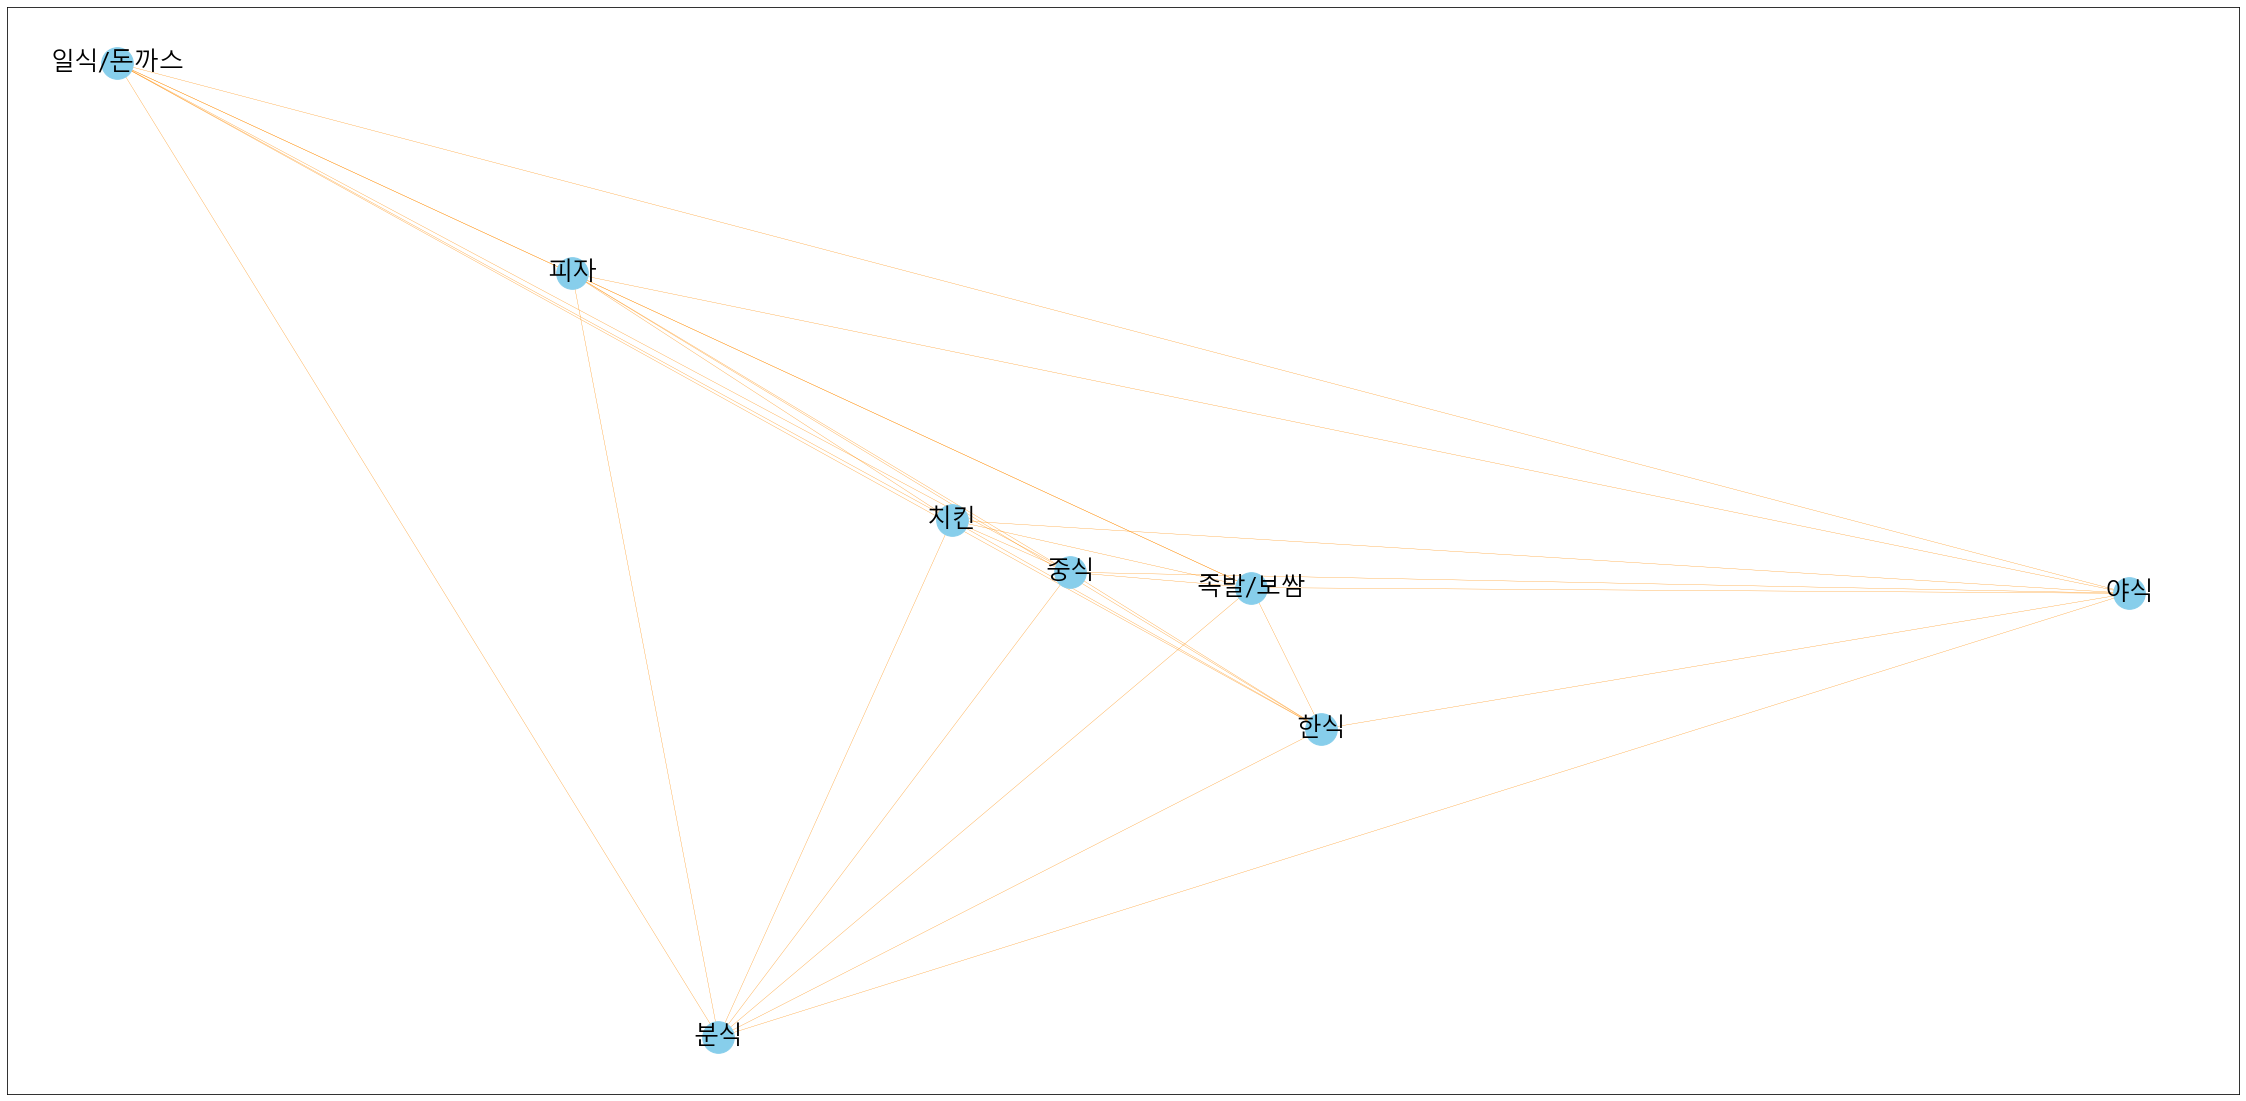

In [12]:
plt.figure(figsize=(40,20))
G = nx.from_pandas_adjacency(df_days_count)
nx.draw_networkx(G,node_size=1000, node_color='skyblue',font_size=25, 
                 font_family = 'Malgun Gothic',edge_color='darkorange',width= 0.3)

In [13]:
sorted(nx.degree_centrality(G).items(), key=lambda item: item[1],reverse=True)

[('한식', 1.2857142857142856),
 ('피자', 1.2857142857142856),
 ('치킨', 1.2857142857142856),
 ('중식', 1.2857142857142856),
 ('족발/보쌈', 1.2857142857142856),
 ('일식/돈까스', 1.2857142857142856),
 ('야식', 1.2857142857142856),
 ('분식', 1.2857142857142856)]

해당 네트워크의 노드들은 같은 중심도를 가집니다. 

## 1-3 요일별 음식 종류 리뷰 횟수 Co-relation 기반 시각화 및 중심도 분석
### 1-3-1 상관관계를 이용한  Heatmap 

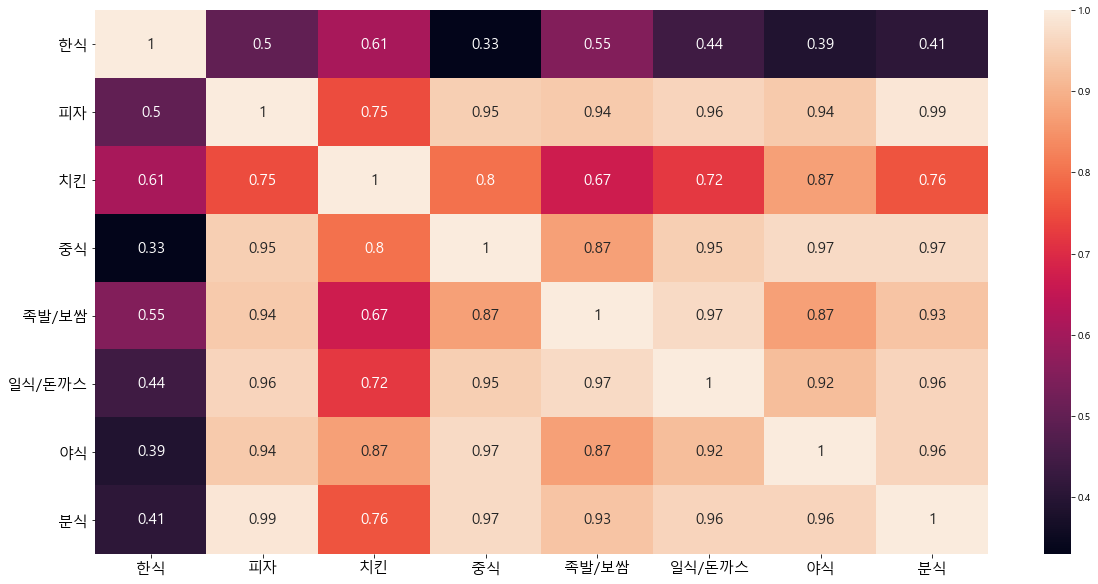

In [14]:
# 요일에 따른 음식 카테고리 상관관계 및 heatmap으로 시각화
df_days = df_days.astype('int')
days_corr = df_days.corr().round(2).fillna(0)

plt.figure(figsize=(20,10))
plt.tick_params(axis='both', which='major', labelsize=15)
sns.heatmap(days_corr, annot=True,annot_kws={'size': 15})
plt.show()

### 상관관계 Heatmap 시각화 해석 (Insight)
여기서 상관관계는 각 요일별로 함께 시킨 횟수가 많은 음식 카테고리에 대해서 높은 값(1에 가까운 값)이 나옵니다.  
따라서, 각 음식 카테고리에 대해서 독립재, 대체재, 연관재로 구분 가능하다고 생각합니다.  

높은 양의 상관관계를 가지는 두가지의 음식에 대해서는 대체재 혹은 연관재로 판단할 수 있다고 생각합니다.   
왜냐하면, 인원이 많은 경우에 피자, 치킨, 햄버거를 함께 시키는 경우가 있고,  
피자를 먹고싶었는데 너무 오래걸릴 것으로 판단이 되면 대체재로 치킨을 시킬 수도 있기 때문입니다.  

위의 음식 상관관계에서 치킨과 족발/보쌈을 제외한 거의 모든 음식에 대한 독립재는 한식이 유일하다고 판단 됩니다.

왜냐하면 치킨과 족발/보쌈을 제외한 음식들에 대해서 0.5보다 낮은 양의 상관관계를 가지기 때문입니다.   
낮은 양의 상관관계는 각 요일에 대한 음식 리뷰 수가 함께 증가하는 경향이 조금 더 낮은 것을 의미합니다.   
이를통해, 한식 리뷰수가 많아지는 경우에 다른 음식점의 리뷰수가 함께 증가하는 관계가 낮으며 이를 통해 배달 횟수를 유추할 수 있습니다.

### 1-3-2 상관관계를 이용한 network

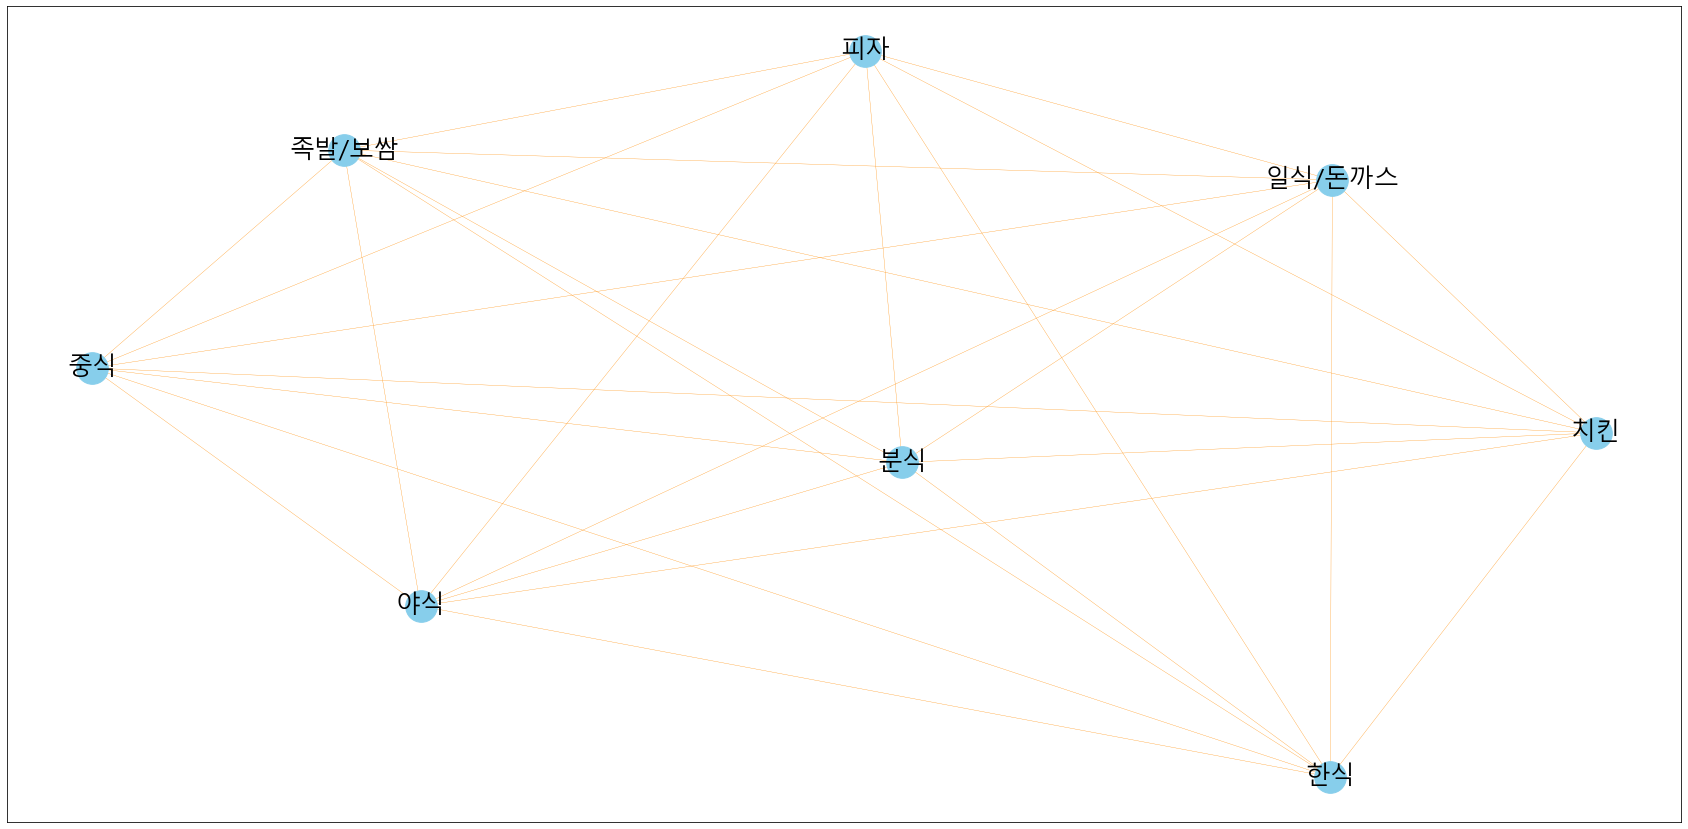

In [15]:
plt.figure(figsize=(30,15))
G = nx.from_pandas_adjacency(days_corr)
nx.draw_networkx(G,node_size=1000, node_color='skyblue',font_size=25, 
                 font_family = 'Malgun Gothic',edge_color='darkorange',width= 0.3)

In [16]:
sorted(nx.degree_centrality(G).items(), key=lambda item: item[1],reverse=True)

[('한식', 1.2857142857142856),
 ('피자', 1.2857142857142856),
 ('치킨', 1.2857142857142856),
 ('중식', 1.2857142857142856),
 ('족발/보쌈', 1.2857142857142856),
 ('일식/돈까스', 1.2857142857142856),
 ('야식', 1.2857142857142856),
 ('분식', 1.2857142857142856)]

In [17]:
sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1],reverse=True)

[('한식', 1.0),
 ('피자', 1.0),
 ('치킨', 1.0),
 ('중식', 1.0),
 ('족발/보쌈', 1.0),
 ('일식/돈까스', 1.0),
 ('야식', 1.0),
 ('분식', 1.0)]

### 상관관계를 이용한 network 해석 (Insight)
- 위에서 볼 수 있듯이 모든 음식에 대해서 양의 상관관계를 가집니다.
- 음식간의 상관관계가 양의 상관관계의 값만 남아있는 만큼 해당 음식들은 연결이 많았습니다.   
- 따라서, 전체 네트워크상에서 centrality를 확인하기는 어려워 이러한 값이 나왔다고 생각합니다. 

-----

## 2. 요일 - 음식점
### 2-1 요일별 각 음식점 이용 횟수 Matrix
각 요일별 음식점 리뷰 횟수를 Matrix로 만들었습니다.   
df_days는 요일을 row , 음식점을 columns로 가집니다.  
df_days를 이용해 각 요일별 음식점 리뷰 횟수에 따른 GVSM기반 netwrok, 상관관계를 이용한 시각화 분석을 했습니다.

In [18]:
df_days = pd.DataFrame(columns = df['업체명'].unique() , index = days)
for day in days:
    df_day = df[df['date'].str.contains(day,na=False)]
    count = []
    for i in restaurants:
        count.append(len(df_day[df_day['업체명'].str.contains(i,na=False)]))
    df_days.loc[day] = count
df_days

,전주석쇠불고기-본점,피자샵-자양성수점,피자마스터,피자나라치킨공주(자양점),참살이임실치즈피자,홍닭,파리에다녀온치킨-건대점,놀부옛날통닭-군자점,굽네치킨-화양점,BHC-중곡점,...,도야족발-본점,HONEY쇼우가족발,LA돈까스,화룡불닭,직화신불닭,화양156,찡떡-통오찡어떡볶이,불난떡볶이-광진구점,미스몽도시락-건대점,동강
월요일,77,114,260,0,73,207,76,95,101,80,...,120,97,85,229,268,64,167,191,190,186
화요일,70,94,215,0,73,168,92,86,73,131,...,120,86,79,219,311,82,136,163,231,153
수요일,63,102,206,0,52,162,77,78,74,118,...,97,88,67,185,268,71,125,160,250,143
목요일,69,103,194,0,49,163,48,70,82,88,...,117,90,73,179,262,67,133,170,195,126
금요일,67,97,182,0,46,165,88,90,80,107,...,96,94,80,159,240,65,118,148,233,139
토요일,113,145,280,0,97,211,108,124,94,129,...,129,83,102,252,320,90,179,212,262,207
일요일,135,162,394,0,114,243,107,197,104,121,...,166,130,128,341,421,115,220,252,181,278


이때, 피자나라치킨공주(자양점)이 결측치로 존재하기때문에 제외했습니다.

In [19]:
df_days = df_days.astype('int').drop('피자나라치킨공주(자양점)',axis=1)
df_days

,전주석쇠불고기-본점,피자샵-자양성수점,피자마스터,참살이임실치즈피자,홍닭,파리에다녀온치킨-건대점,놀부옛날통닭-군자점,굽네치킨-화양점,BHC-중곡점,BHC-중곡대박점,...,도야족발-본점,HONEY쇼우가족발,LA돈까스,화룡불닭,직화신불닭,화양156,찡떡-통오찡어떡볶이,불난떡볶이-광진구점,미스몽도시락-건대점,동강
월요일,77,114,260,73,207,76,95,101,80,162,...,120,97,85,229,268,64,167,191,190,186
화요일,70,94,215,73,168,92,86,73,131,291,...,120,86,79,219,311,82,136,163,231,153
수요일,63,102,206,52,162,77,78,74,118,226,...,97,88,67,185,268,71,125,160,250,143
목요일,69,103,194,49,163,48,70,82,88,152,...,117,90,73,179,262,67,133,170,195,126
금요일,67,97,182,46,165,88,90,80,107,148,...,96,94,80,159,240,65,118,148,233,139
토요일,113,145,280,97,211,108,124,94,129,204,...,129,83,102,252,320,90,179,212,262,207
일요일,135,162,394,114,243,107,197,104,121,250,...,166,130,128,341,421,115,220,252,181,278


## 2-2 요일별  음식점 리뷰 횟수 GVSM기반 Network


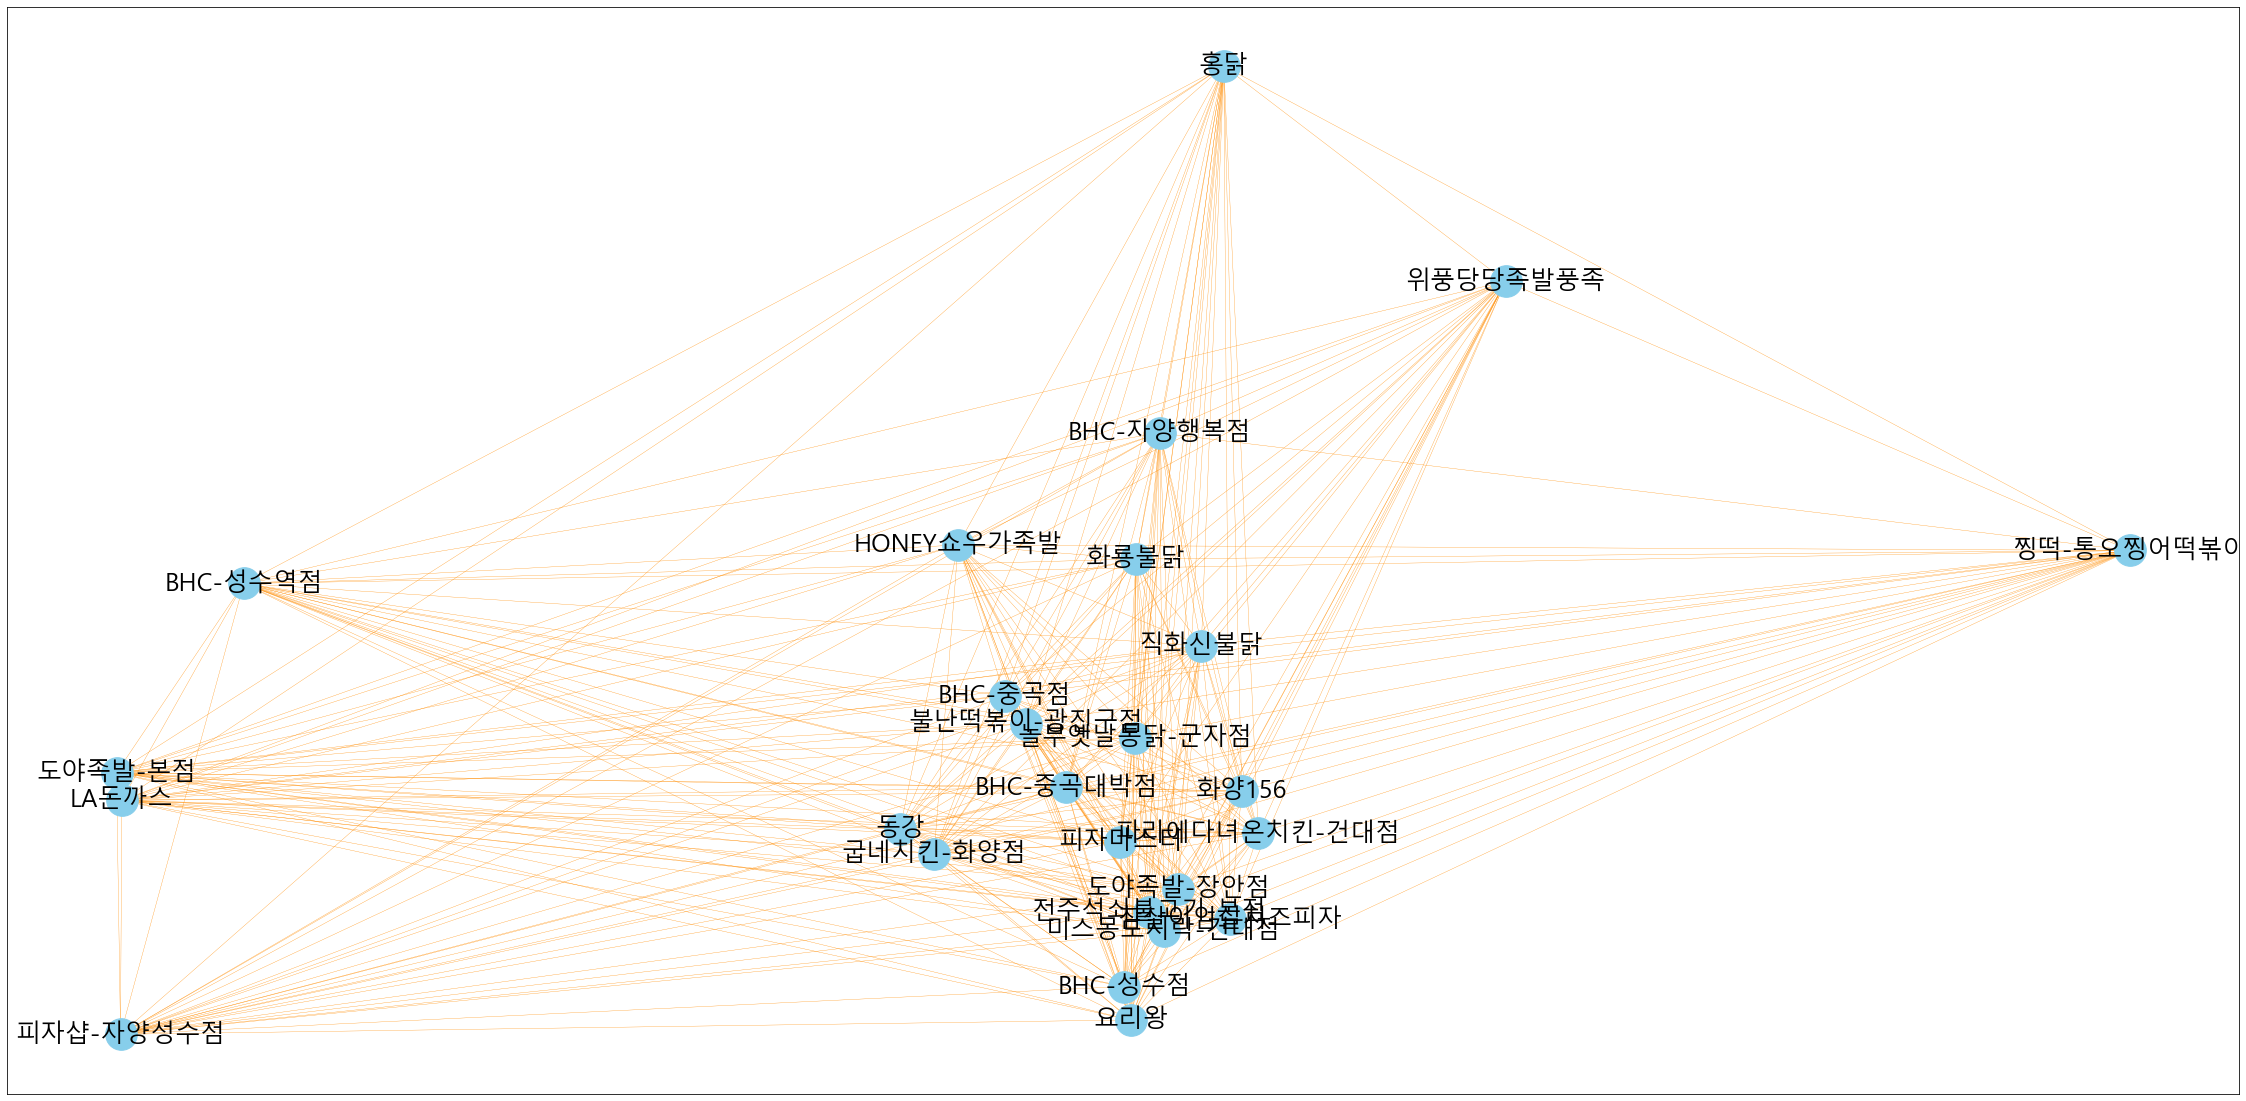

In [20]:
df_dd = df_days.T.dot(df_days).astype('int')
plt.figure(figsize=(40,20))
G = nx.from_pandas_adjacency(df_dd)
nx.draw_networkx(G,node_size=1000, node_color='skyblue',font_size=25, 
                 font_family = 'Malgun Gothic',edge_color='darkorange',width= 0.3)

In [21]:
sorted(nx.degree_centrality(G).items(), key=lambda item: item[1],reverse=True)

[('전주석쇠불고기-본점', 1.08),
 ('피자샵-자양성수점', 1.08),
 ('피자마스터', 1.08),
 ('참살이임실치즈피자', 1.08),
 ('홍닭', 1.08),
 ('파리에다녀온치킨-건대점', 1.08),
 ('놀부옛날통닭-군자점', 1.08),
 ('굽네치킨-화양점', 1.08),
 ('BHC-중곡점', 1.08),
 ('BHC-중곡대박점', 1.08),
 ('BHC-자양행복점', 1.08),
 ('BHC-성수점', 1.08),
 ('BHC-성수역점', 1.08),
 ('요리왕', 1.08),
 ('위풍당당족발풍족', 1.08),
 ('도야족발-장안점', 1.08),
 ('도야족발-본점', 1.08),
 ('HONEY쇼우가족발', 1.08),
 ('LA돈까스', 1.08),
 ('화룡불닭', 1.08),
 ('직화신불닭', 1.08),
 ('화양156', 1.08),
 ('찡떡-통오찡어떡볶이', 1.08),
 ('불난떡볶이-광진구점', 1.08),
 ('미스몽도시락-건대점', 1.08),
 ('동강', 1.08)]

해당 네트워크의 노드들은 같은 중심도를 가집니다.

## 2-3  요일별 음식점 리뷰 횟수 Co-relation 기반 시각화 및 중심도 분석
### 2-3-1 상관관계를 이용한 Heatmap

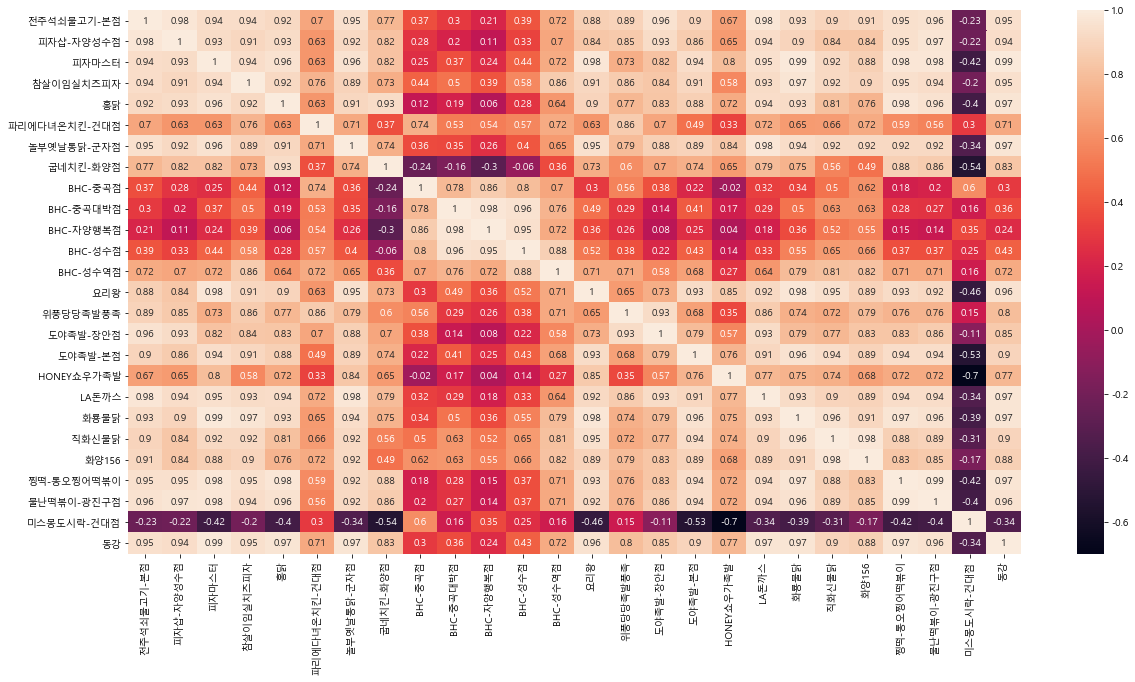

In [22]:
# 요일에 따른 음식점의 상관관계 및 heatmap으로 시각화
df_days = df_days.astype('int')
days_corr = df_days.corr().round(2).fillna(0)
plt.figure(figsize=(20,10))
sns.heatmap(days_corr, annot=True,)
plt.show()

### 상관관계 Heatmap 시각화 해석 (Insight)
여기서 상관관계는 각 요일별로 함께 시킨 횟수가 많은 음식점들에 대해서 높은 값(1에 가까운 값)이 나옵니다.  
따라서, 각 음식점에 대해서 독립재, 대체재, 연관재로 구분 가능하다고 생각합니다.  

높은 양의 상관관계에 대해서는 대체재 혹은 연과재로 판단할 수 있다고 생각합니다.   
왜냐하면, 인원이 많은 경우에 피자, 치킨, 햄버거를 함께 시키는 경우가 있고,  
피자를 먹고싶었는데 너무 오래걸릴 것으로 판단이 되면 대체재로 치킨을 시킬 수도 있기 때문입니다.  

위의 히트맵에 따르면 BHC치킨집 간의 상관관걔는 양의 상관관계이지만 낮은 상관관계를 알 수 있습니다.
이를 통해 BHC를 주문하는 고객을 다양한 지점에서 주문을 하기 때문에 낮은 상관관계라고 생각합니다.
이때, BHC성수역점은 다른 BHC 지점과의 거리가 상대적으로 멀어 높은 상관관계를 갖는다고 판단 됩니다.

위의 음식점 상관관계에서 치킨 가게(굽네치킨 제외)를 제외한 거의 모든 음식점에 대한 독립재는 미스몽도시락-건대점이 유일하다고 판단 됩니다.  
왜냐하면 BHC, 파리에다녀온치킨을 제외한 음식점들에 대해서 음의 상관관계를 가지기 때문입니다.   
음의 상관관계는 각 요일에 대한 음식점 리뷰 수가 반비례하다는 것을 의미합니다.  
이를통해, 미스몽건대점 리뷰수가 많아지는 경우에 다른 음식점의 리뷰수가 적어지며 이는 배달 횟수를 유추할 수 있습니다.

### 2-3-2 상관관계를 이용한 network

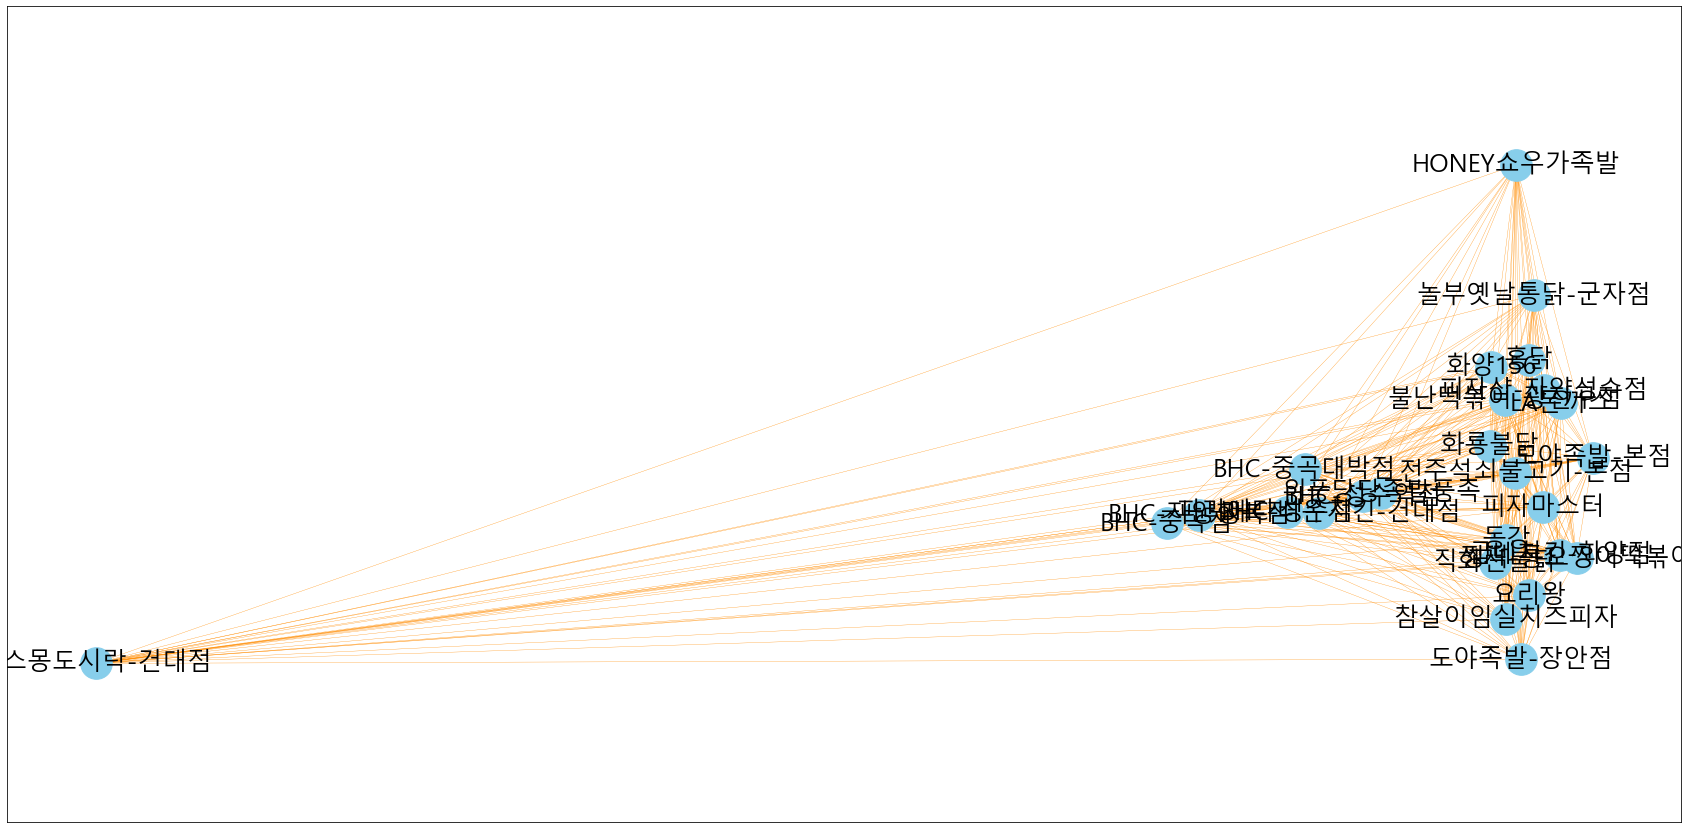

In [23]:
plt.figure(figsize=(30,15))
G = nx.from_pandas_adjacency(days_corr)
nx.draw_networkx(G,node_size=1000, node_color='skyblue',font_size=25, 
                 font_family = 'Malgun Gothic',edge_color='darkorange',width= 0.3)

### 상관관계를 이용한 network 해석 1
- 위에서 볼 수 있듯이 미스몽도시락-건대점은 거의 모든 음식점에 대해서 음의 상관관계를 가집니다.
- 따라서 위처럼 미스몽도시락만 center network로부터 멀리 떨어져 있는 것을 확인할 수 있습니다.
- Central network를 관찰하기 위해 아래에서는 미스몽도시락-건대점을 제외하고 다시 시각화 했습니다.

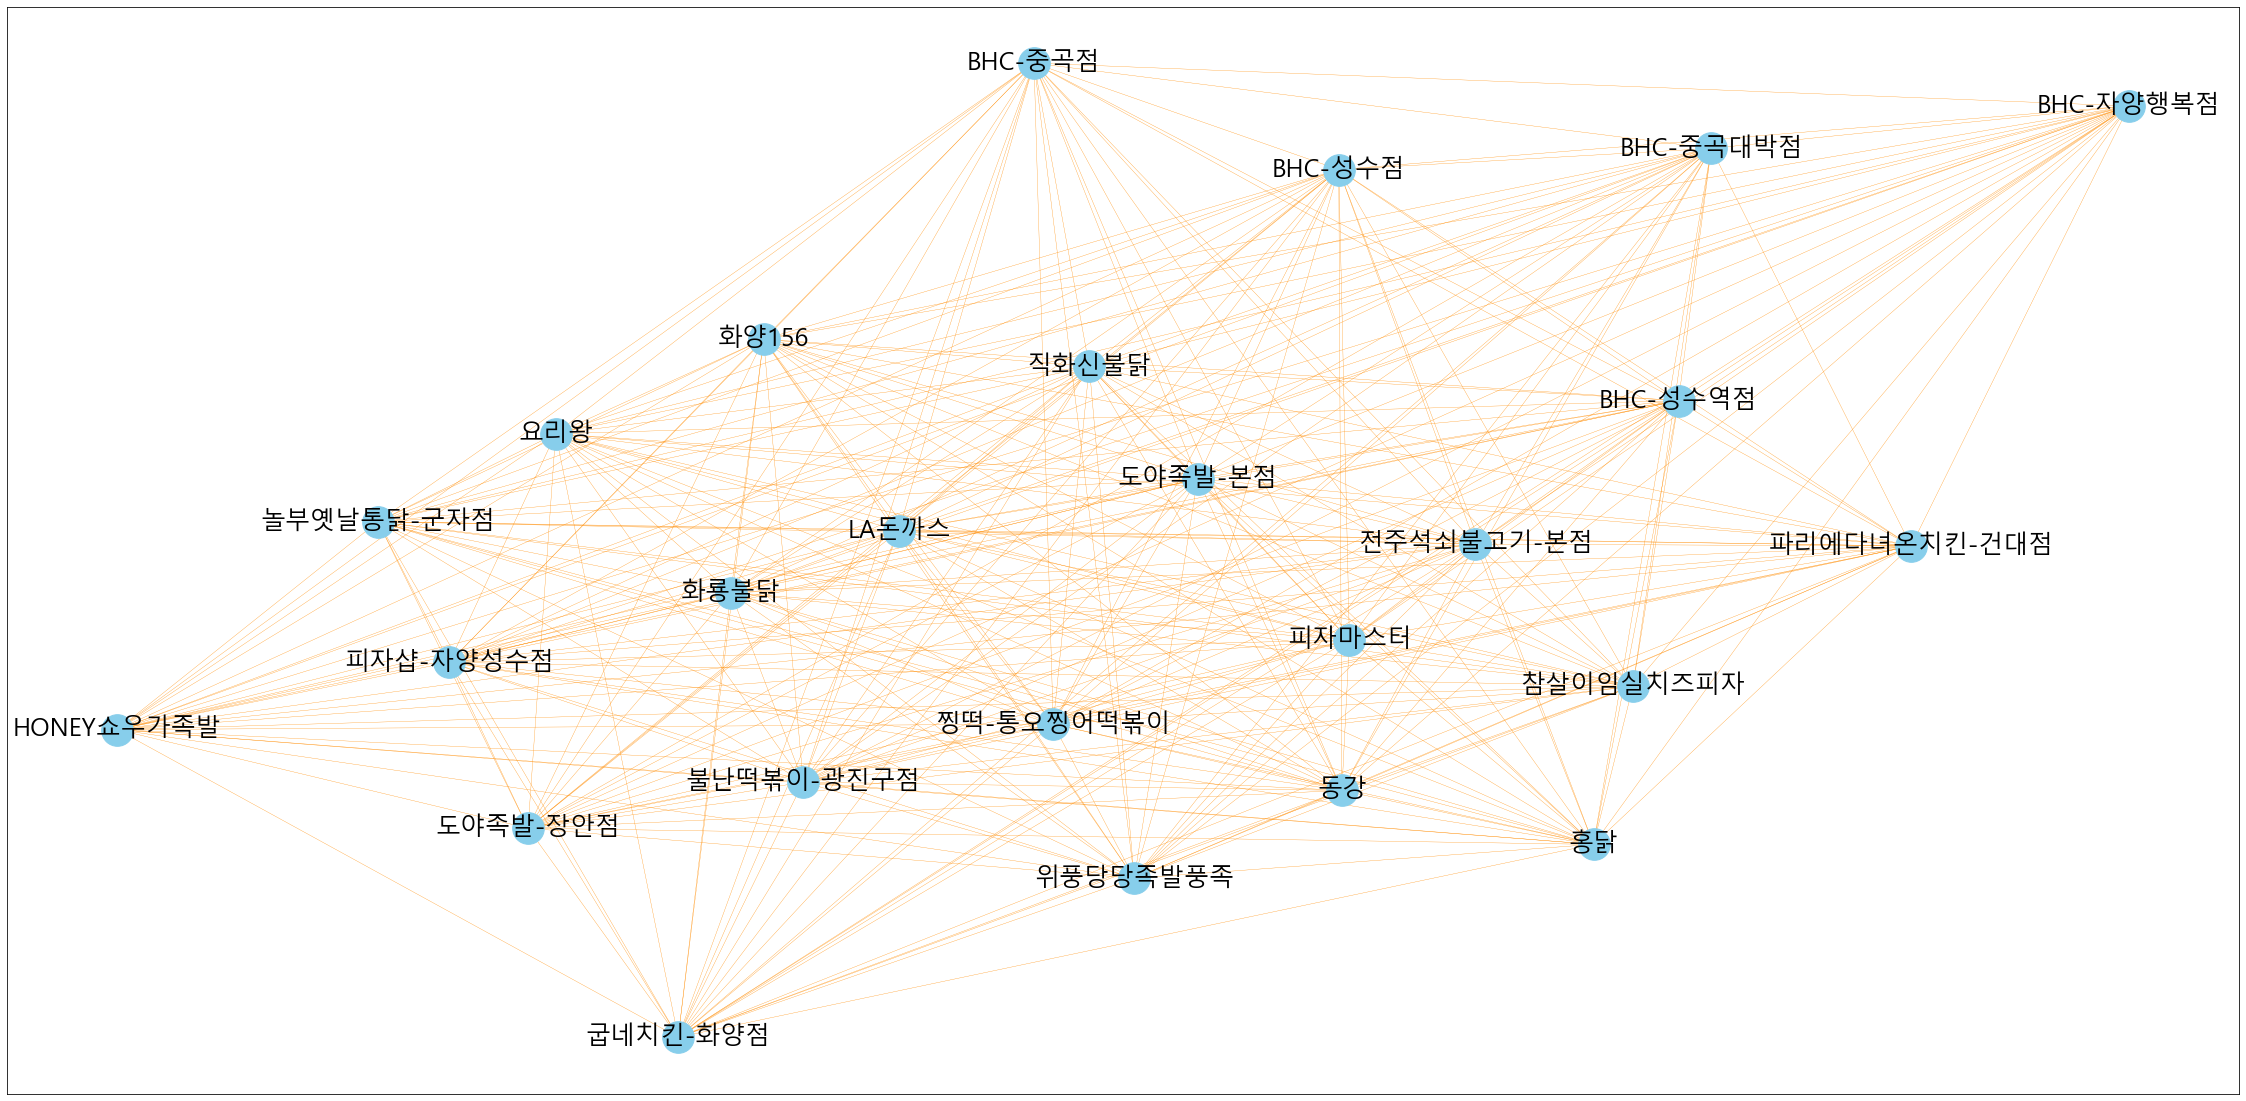

In [24]:
days_corr_exept = days_corr.drop('미스몽도시락-건대점')
plt.figure(figsize=(40,20))
G = nx.from_pandas_adjacency(days_corr_exept)
nx.draw_networkx(G,node_size=1000, node_color='skyblue',font_size=25, font_family = 'Malgun Gothic',edge_color='darkorange',width= 0.3)

In [25]:
sorted(nx.degree_centrality(G).items(), key=lambda item: item[1],reverse=True)

[('전주석쇠불고기-본점', 1.0833333333333333),
 ('피자샵-자양성수점', 1.0833333333333333),
 ('피자마스터', 1.0833333333333333),
 ('참살이임실치즈피자', 1.0833333333333333),
 ('홍닭', 1.0833333333333333),
 ('파리에다녀온치킨-건대점', 1.0833333333333333),
 ('놀부옛날통닭-군자점', 1.0833333333333333),
 ('굽네치킨-화양점', 1.0833333333333333),
 ('BHC-중곡점', 1.0833333333333333),
 ('BHC-중곡대박점', 1.0833333333333333),
 ('BHC-자양행복점', 1.0833333333333333),
 ('BHC-성수점', 1.0833333333333333),
 ('BHC-성수역점', 1.0833333333333333),
 ('요리왕', 1.0833333333333333),
 ('위풍당당족발풍족', 1.0833333333333333),
 ('도야족발-장안점', 1.0833333333333333),
 ('도야족발-본점', 1.0833333333333333),
 ('HONEY쇼우가족발', 1.0833333333333333),
 ('LA돈까스', 1.0833333333333333),
 ('화룡불닭', 1.0833333333333333),
 ('직화신불닭', 1.0833333333333333),
 ('화양156', 1.0833333333333333),
 ('찡떡-통오찡어떡볶이', 1.0833333333333333),
 ('불난떡볶이-광진구점', 1.0833333333333333),
 ('동강', 1.0833333333333333)]

### 상관관계를 이용한 network 해석 2
해당 네트워크의 노드들은 같은 중심도를 가집니다.  
음식점간의 상관관계가 양의 상관관계의 값만 남아있는 만큼 해당 음식점들은 연결이 많았습니다.   
따라서, 이미 전체 네트워크상에서 중앙에 위치한 음식점들 이였으므로   
미스몽도시락이 제거된 현재 상황에서 centrality를 확인하기는 어려워 이러한 값이 나왔다고 생각합니다. 

### 3. 각 요일별 가장 많은 리뷰횟수 업체

In [26]:
maxs = list(df_days.max(axis=1))

for day,max_num in zip(days, maxs):
    for i in df_days.columns:
        if True in list(df_days[i]==max_num):
            print(day+'일' ,i)

월요일일 도야족발-장안점
화요일일 직화신불닭
수요일일 직화신불닭
목요일일 도야족발-장안점
금요일일 도야족발-장안점
토요일일 도야족발-장안점
일요일일 도야족발-장안점


각 요일별 리뷰 횟수가 많은 업체를 선정했습니다.  
- 월,목,토,일 : 도야족발 -장안점  
- 화, 수 : 직화신불닭  
  
이를 통해 다음 평점에 따른 메뉴 분석에서 해당 업체를 우선적으로 분석 할 예정입니다.

# 4. 결과
[목표]
* 요일에 따른 음식 종류 및 업체 상관관계 파악

[사용한 분석 방법]
1. GVSM 
2. Network + Centrality
3. Corelation

데이터 탐색을 통해 각 컬럼에 대한 값과 결측치를 확인했습니다.  
맛, 양, 배달의 결측치가 15,721개로 동일함을 확인했습니다.  
이를통해 맛,양,배달의 평점은 함께 있거나 혹은 없거나한 것을 알 수 있었습니다.  
그리고 각 업체의 리뷰수를 막대그래프로 시각화하여 각 업체의 리뷰수를 한 눈에 파악할 수 있도록 했습니다.  
  
그 후 수업시간에 배웠던 doc-term의 matrix를 이용해  
각 요일별 - 음식종류(카테고리) matrix를 만들어 TF를 계산했습니다.  
이렇게 구한 요일-음식종류 * 음식종류-요일 = 음식종류-음식종류 matrix를 만들었고 네트워크를 만들고 centrality를 계산했습니다.  
이때, 중심도를 계산했을때 유의미한 차이를 확인하지 못하였습니다.  
   
이를 보완하기위해 상관관계분석을 통해 히트맵으로 시각화했습니다.  
   
히트맵을 통해 한식이 다른 음식종류와 낮은 상관관계를 가짐을 확인했습니다.   
이를 통해 한식은 다른 음식종류에 대해 상대적으로 독립적(치킨 - 피자 간 교차 주문 횟수)이라는 판단을 했습니다.  
   
그 후 같은 방법으로 요일별- 업체  matrix를 만들어 TF를 계산했습니다.  
이때, 피자나라치킨공주(자양점)이 결측치로 존재하여 데이터를 생략했습니다.     
같은 방법으로 term-term matrix에서 착안한 업체-업체 matrix를 만들어 요일 별 동시출현 업체 네트워크를 만들었습니다.   
위에서 만든 TF matrix를 이용해 상관관계를 히트맵으로 시각화했고 한식 업체인 미스몽도시락-건대점이 거의 모든 다른 업체와 음의 상관관계를 가짐을 확인했습니다.   
이를 통해  미스몽건대점 리뷰수가 많아지는 경우에 다른 음식점의 리뷰수가 적어지며 이는 배달 횟수를 유추할 수 있었습니다.   

요일별 음식종류, 요일별 음식업체를 분석하여 요일에 따른 음식종류와 업체의 관계를 확인할 수 있었습니다.